### Feature Engineering

### 1. Importing Libraries
import the necessary libraries needed for feature engineering

In [31]:
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk
from nltk.util import bigrams, trigrams
from nltk.corpus import stopwords
from gensim.models import Word2Vec #install gensim # had to use this: pip install --upgrade gensim smart_open protobuf==3.20.0
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from scipy.stats import chi2_contingency


Download various NLTK resources necessary for performing natural language processing tasks

In [32]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-dat

True

Use pandas to read the cleaned and preprocessed data stored in a pickle file named "data_cleaned.pkl"

In [33]:
data = pd.read_pickle('data/data_cleaned.pkl')

In [34]:
data.head()

,comment,parent_comment,label
0,just shoot some unarmed black guy and get paid...,"a pregnant police officer asked for ""light dut...",1
1,that is like saying the relative weakness or i...,"well, no, it is better. just not ideal. it is ...",0
2,except pluto would not give us any cool space ...,we would live out destiny as pluto would becom...,0
3,"you are probably right, it is more like: ""oh, ...",i really do not think they feel even a little ...,0
4,"or that 85 hour working abroad pipeline money,...",i am talkin bout that veterans day pay that th...,0


### 2.Tokenizing  
Define a function tokenize_text that takes a text input and generates unigrams, bigrams, or trigrams based on the specified ngram parameter. Apply the tokenize_text function to tokenize the 'comment' and 'parent_comment' columns into unigrams, bigrams, and trigrams, creating new columns for each tokenization type.

In [35]:
def tokenize_text(text, ngram='unigram'):
    tokens = nltk.word_tokenize(text)
    
    if ngram == 'unigram':
        return tokens
    elif ngram == 'bigram':
        return list(bigrams(tokens))
    elif ngram == 'trigram':
        return list(trigrams(tokens))
    else:
        raise ValueError("ngram should be either 'unigram', 'bigram', or 'trigram'")

# Unigram Tokenizing
data["comment_tokens"] = data["comment"].apply(lambda x: tokenize_text(x, 'unigram'))
data["parent_comment_tokens"] = data["parent_comment"].apply(lambda x: tokenize_text(x, 'unigram'))

# Bigram Tokenizing
data["comment_tokens_bigram"] = data["comment"].apply(lambda x: tokenize_text(x, 'bigram'))
data["parent_comment_tokens_bigram"] = data["parent_comment"].apply(lambda x: tokenize_text(x, 'bigram'))

# Trigram Tokenizing
data["comment_tokens_trigram"] = data["comment"].apply(lambda x: tokenize_text(x, 'trigram'))
data["parent_comment_tokens_trigram"] = data["parent_comment"].apply(lambda x: tokenize_text(x, 'trigram'))

In [36]:
"""
#spellchecking
#%pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()
data['comment_tokens'] = data['comment_tokens'].apply(lambda tokens: [spell.correction(token) for token in tokens])
data['parent_comment_tokens'] = data['parent_comment_tokens'].apply(lambda tokens: [spell.correction(token) for token in tokens])
"""

"\n#spellchecking\n#%pip install pyspellchecker\nfrom spellchecker import SpellChecker\nspell = SpellChecker()\ndata['comment_tokens'] = data['comment_tokens'].apply(lambda tokens: [spell.correction(token) for token in tokens])\ndata['parent_comment_tokens'] = data['parent_comment_tokens'].apply(lambda tokens: [spell.correction(token) for token in tokens])\n"

### 3. Removing Stop Words 

Remove words no and not from stop_words. Defines a filtering function for unigrams, which removes stopwords from a list of tokens. Defines a filtering function for bigrams, which removes bigrams where both words are stopwords. Defines a filtering function for trigrams, which removes trigrams where all three words are stopwords. Applies the defined filtering functions to the tokenized unigrams, bigrams, and trigrams, removing stopwords based on the customized stopword set.

In [37]:
#remove possible words from stop_words that can change meaning of text
stop_words = set(stopwords.words('english'))

to_remove = ["no","not"]
for word in to_remove:
    stop_words.remove(word)
# Filtering function for unigrams
def filter_unigrams(tokens):
    return [token for token in tokens if token not in stop_words]

# Filtering function for bigrams
def filter_bigrams(bigram_tokens):
    return [bigram for bigram in bigram_tokens if not all(word in stop_words for word in bigram)]

# Filtering function for trigrams
def filter_trigrams(trigram_tokens):
    return [trigram for trigram in trigram_tokens if not all(word in stop_words for word in trigram)]

# Apply the filtering functions
data["comment_tokens"] = data["comment_tokens"].apply(filter_unigrams)
data["parent_comment_tokens"] = data["parent_comment_tokens"].apply(filter_unigrams)

data["comment_tokens_bigram"] = data["comment_tokens_bigram"].apply(filter_bigrams)
data["parent_comment_tokens_bigram"] = data["parent_comment_tokens_bigram"].apply(filter_bigrams)

data["comment_tokens_trigram"] = data["comment_tokens_trigram"].apply(filter_trigrams)
data["parent_comment_tokens_trigram"] = data["parent_comment_tokens_trigram"].apply(filter_trigrams)

### 4.Lemmatization 
Define a lemmatization function for unigrams, bigrams, trigrams which applies lemmatization to the tokenized unigrams, bigrams, and trigrams, converting words to their base or root forms.

In [38]:
lemmatizer = WordNetLemmatizer()
# Lemmatize function for unigrams
def lemmatize_unigrams(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Lemmatize function for bigrams
def lemmatize_bigrams(bigram_tokens):
    return [' '.join([lemmatizer.lemmatize(word) for word in bigram]) for bigram in bigram_tokens]

# Lemmatize function for trigrams
def lemmatize_trigrams(trigram_tokens):
    return [' '.join([lemmatizer.lemmatize(word) for word in trigram]) for trigram in trigram_tokens]

# Apply the lemmatize functions
data["comment_tokens"] = data["comment_tokens"].apply(lemmatize_unigrams)
data["parent_comment_tokens"] = data["parent_comment_tokens"].apply(lemmatize_unigrams)

data["comment_tokens_bigram"] = data["comment_tokens_bigram"].apply(lemmatize_bigrams)
data["parent_comment_tokens_bigram"] = data["parent_comment_tokens_bigram"].apply(lemmatize_bigrams)

data["comment_tokens_trigram"] = data["comment_tokens_trigram"].apply(lemmatize_trigrams)
data["parent_comment_tokens_trigram"] = data["parent_comment_tokens_trigram"].apply(lemmatize_trigrams)

### 5. Sentiment Analysis

Utilizes the polarity_scores method of the VADER analyzer to compute the compound sentiment score for each comment and parent comment. The compound score represents the overall sentiment, combining positive, negative, and neutral scores.

In [39]:
sia = SentimentIntensityAnalyzer()
data['comment_score'] = data['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['parent_comment_score'] = data['parent_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

Creates a box plot of comment sentiment scores

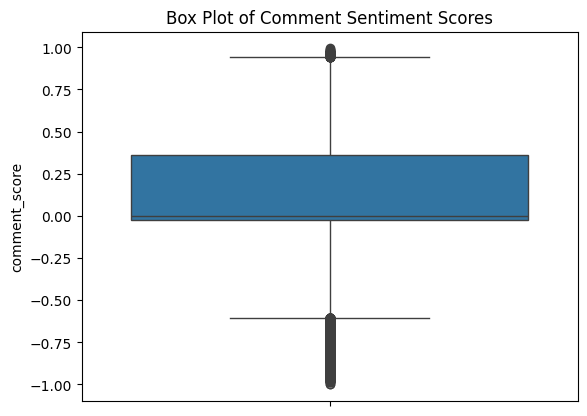

In [61]:
sns.boxplot(data['comment_score'])
plt.title('Box Plot of Comment Sentiment Scores')
plt.show()

Creates a box plot of parent comment sentiment scores

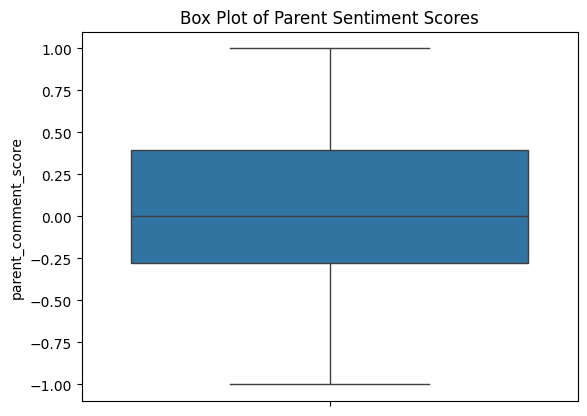

In [41]:
sns.boxplot(data['parent_comment_score'])
plt.title('Box Plot of Parent Sentiment Scores')
plt.show()

Create a kernel density plot comparing the distribution of sentiment scores for both comments and parent comments. This plot provides insights into the density and shape of the sentiment score distributions.

C:\Users\User\AppData\Local\Temp\ipykernel_8520\2726375268.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['comment_score'], shade=True, color = 'blue')
C:\Users\User\AppData\Local\Temp\ipykernel_8520\2726375268.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['parent_comment_score'], shade = True, color='red')


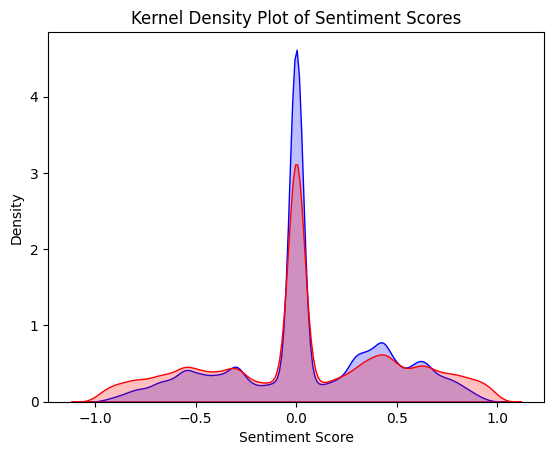

In [42]:
sns.kdeplot(data['comment_score'], shade=True, color = 'blue')
sns.kdeplot(data['parent_comment_score'], shade = True, color='red')
plt.title('Kernel Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

categorizes parent comment and comment sentiment scores into three labels ('positive,' 'negative,' or 'neutral') based on predefined thresholds. 

In [43]:
def sentiment(score):
    if (score >= 0.25):
        return 'positive'
    elif (score <= -0.25):
        return 'negative'
    else:
        return 'neutral'
    
data['weighted_comment_sentiment_score'] = data['comment_score'].apply(sentiment)
data['weighted_parent_sentiment_score'] = data['parent_comment_score'].apply(sentiment)
data.head()

,comment,parent_comment,label,comment_tokens,parent_comment_tokens,comment_tokens_bigram,parent_comment_tokens_bigram,comment_tokens_trigram,parent_comment_tokens_trigram,comment_score,parent_comment_score,weighted_comment_sentiment_score,weighted_parent_sentiment_score
0,just shoot some unarmed black guy and get paid...,"a pregnant police officer asked for ""light dut...",1,"[shoot, unarmed, black, guy, get, paid, leave, .]","[pregnant, police, officer, asked, ``, light, ...","[just shoot, shoot some, some unarmed, unarmed...","[a pregnant, pregnant police, police officer, ...","[just shoot some, shoot some unarmed, some una...","[a pregnant police, pregnant police officer, p...",-0.3818,-0.0523,negative,neutral
1,that is like saying the relative weakness or i...,"well, no, it is better. just not ideal. it is ...",0,"[like, saying, relative, weakness, ineffective...","[well, ,, no, ,, better, ., not, ideal, ., lot...","[is like, like saying, saying the, the relativ...","[well ,, , no, no ,, , it, is better, better ....","[that is like, is like saying, like saying the...","[well , no, , no ,, no , it, , it is, it is be...",-0.8126,-0.5709,negative,negative
2,except pluto would not give us any cool space ...,we would live out destiny as pluto would becom...,0,"[except, pluto, would, not, give, u, cool, spa...","[would, live, destiny, pluto, would, become, t...","[except pluto, pluto would, would not, not giv...","[we would, would live, live out, out destiny, ...","[except pluto would, pluto would not, would no...","[we would live, would live out, live out desti...",0.3182,0.0000,positive,neutral
3,"you are probably right, it is more like: ""oh, ...",i really do not think they feel even a little ...,0,"[probably, right, ,, like, :, ``, oh, ,, know,...","[really, not, think, feel, even, little, guilt...","[are probably, probably right, right ,, , it, ...","[i really, really do, do not, not think, think...","[you are probably, are probably right, probabl...","[i really do, really do not, do not think, not...",0.4643,-0.7848,positive,negative
4,"or that 85 hour working abroad pipeline money,...",i am talkin bout that veterans day pay that th...,0,"[85, hour, working, abroad, pipeline, money, ,...","[talkin, bout, veteran, day, pay, thanksgiving...","[that 85, 85 hour, hour working, working abroa...","[am talkin, talkin bout, bout that, that veter...","[or that 85, that 85 hour, 85 hour working, ho...","[i am talkin, am talkin bout, talkin bout that...",-0.6428,-0.2023,negative,neutral


creates a contingency table to explore the relationship between sentiment scores (categorized as 'positive,' 'negative,' or 'neutral') and the 'label' column. The contingency table presents a summary of how sentiment is distributed within each label category, offering insights into potential associations between sentiment and labels in the dataset.

In [44]:
contingency_table = pd.crosstab(data['label'], data['weighted_comment_sentiment_score'])

# Display the contingency table
print(contingency_table)

weighted_comment_sentiment_score  negative  neutral  positive
label                                                        
0                                    18883    52057     30025
1                                    21556    45973     33529


performs a chi-square test for independence to assess whether there is a significant association between sentiment scores (categorized as 'positive,' 'negative,' 'neutral') and the 'label' column in the dataset. 

In [45]:
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Value: {chi2}')
print(f'P-value: {p}')

Chi-Square Value: 747.420822690915
P-value: 5.007610286465115e-163


generates a stacked bar plot to visually represent the distribution of labels ('Not Sarcastic' and 'Sarcastic') across different sentiment scores ('positive,' 'negative,' 'neutral'). The plot provides insights into the relationship between sentiment scores and labels in the dataset.

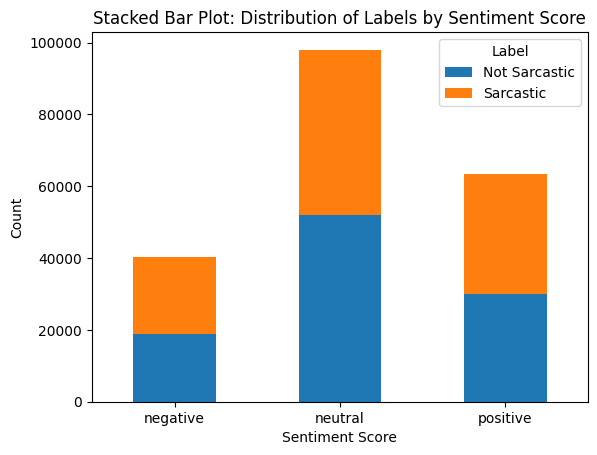

In [46]:
stacked_data = data.groupby(['weighted_comment_sentiment_score', 'label']).size().unstack().fillna(0)

stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Distribution of Labels by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Not Sarcastic', 'Sarcastic'])
plt.show()

generates a heatmap to visually represent the distribution of labels ('Not Sarcastic' and 'Sarcastic') across different sentiment scores ('positive,' 'negative,' 'neutral'). The heatmap provides an overview of the relationship between sentiment scores and labels in the dataset.

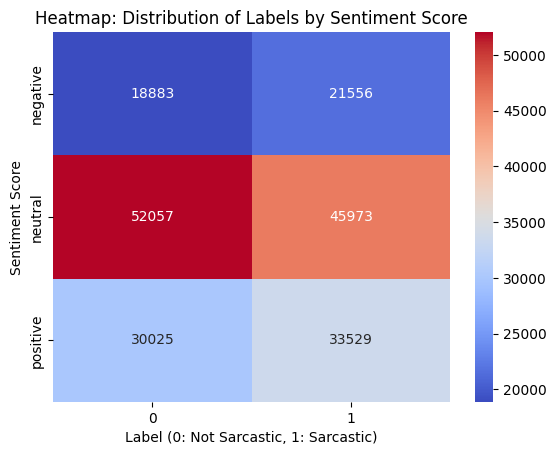

In [47]:
heatmap_data = data.groupby(['weighted_comment_sentiment_score', 'label']).size().unstack().fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap: Distribution of Labels by Sentiment Score')
plt.xlabel('Label (0: Not Sarcastic, 1: Sarcastic)')
plt.ylabel('Sentiment Score')
plt.show()

performs one-hot encoding on the sentiment score columns ('weighted_parent_sentiment_score' and 'weighted_comment_sentiment_score')

In [48]:
# One Hot Encode Weighted Sentiment Scores
data = pd.get_dummies(data, columns = ['weighted_parent_sentiment_score','weighted_comment_sentiment_score'], drop_first=True)

In [49]:
data.head()

,comment,parent_comment,label,comment_tokens,parent_comment_tokens,comment_tokens_bigram,parent_comment_tokens_bigram,comment_tokens_trigram,parent_comment_tokens_trigram,comment_score,parent_comment_score,weighted_parent_sentiment_score_neutral,weighted_parent_sentiment_score_positive,weighted_comment_sentiment_score_neutral,weighted_comment_sentiment_score_positive
0,just shoot some unarmed black guy and get paid...,"a pregnant police officer asked for ""light dut...",1,"[shoot, unarmed, black, guy, get, paid, leave, .]","[pregnant, police, officer, asked, ``, light, ...","[just shoot, shoot some, some unarmed, unarmed...","[a pregnant, pregnant police, police officer, ...","[just shoot some, shoot some unarmed, some una...","[a pregnant police, pregnant police officer, p...",-0.3818,-0.0523,True,False,False,False
1,that is like saying the relative weakness or i...,"well, no, it is better. just not ideal. it is ...",0,"[like, saying, relative, weakness, ineffective...","[well, ,, no, ,, better, ., not, ideal, ., lot...","[is like, like saying, saying the, the relativ...","[well ,, , no, no ,, , it, is better, better ....","[that is like, is like saying, like saying the...","[well , no, , no ,, no , it, , it is, it is be...",-0.8126,-0.5709,False,False,False,False
2,except pluto would not give us any cool space ...,we would live out destiny as pluto would becom...,0,"[except, pluto, would, not, give, u, cool, spa...","[would, live, destiny, pluto, would, become, t...","[except pluto, pluto would, would not, not giv...","[we would, would live, live out, out destiny, ...","[except pluto would, pluto would not, would no...","[we would live, would live out, live out desti...",0.3182,0.0000,True,False,False,True
3,"you are probably right, it is more like: ""oh, ...",i really do not think they feel even a little ...,0,"[probably, right, ,, like, :, ``, oh, ,, know,...","[really, not, think, feel, even, little, guilt...","[are probably, probably right, right ,, , it, ...","[i really, really do, do not, not think, think...","[you are probably, are probably right, probabl...","[i really do, really do not, do not think, not...",0.4643,-0.7848,False,False,False,True
4,"or that 85 hour working abroad pipeline money,...",i am talkin bout that veterans day pay that th...,0,"[85, hour, working, abroad, pipeline, money, ,...","[talkin, bout, veteran, day, pay, thanksgiving...","[that 85, 85 hour, hour working, working abroa...","[am talkin, talkin bout, bout that, that veter...","[or that 85, that 85 hour, 85 hour working, ho...","[i am talkin, am talkin bout, talkin bout that...",-0.6428,-0.2023,True,False,False,False


### 6. Basic Text Features
- extracted these features mostly from the original sentences
- extracted token count, unique token count and mean token length

 performs feature engineering by extracting various statistical features from pre-tokenized text data. These features capture information about word and token counts, unique words and tokens, stopwords, mean word/token length, character count, punctuation count, hashtag count, and number count for both comments and parent comments.

In [50]:
#data = data[['label','comment', 'parent_comment']]
###pre-tokenised###
# Word Count
data['comment_word_count'] = data['comment'].apply(lambda x: len(str(x).split()))
data['parent_comment_word_count'] = data['parent_comment'].apply(lambda x: len(str(x).split()))
data['comment_token_count'] = data['comment_tokens'].apply(lambda x: len(x))
data['parent_comment_token_count'] = data['parent_comment_tokens'].apply(lambda x: len(x))

# Unique Word Count
data['comment_unique_word_count'] = data['comment'].apply(lambda x: len(set(str(x).split())))
data['parent_comment_unique_word_count'] = data['parent_comment'].apply(lambda x: len(set(str(x).split())))
data['comment_unique_token_count'] = data['comment_tokens'].apply(lambda x: len(set(x)))
data['parent_comment_unique_token_count'] = data['parent_comment_tokens'].apply(lambda x: len(set(x)))

# Stop Word Count
stop = stopwords.words('english')
data['comment_stopword_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop]))
data['parent_comment_stopword_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop]))

# Mean Word Length
data['comment_mean_word_length'] = data['comment'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
data['parent_comment_mean_word_length'] = data['parent_comment'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
data['comment_mean_token_length'] = data['comment_tokens'].apply(lambda x: np.mean([len(token) for token in x]))
data['parent_comment_mean_token_length'] = data['parent_comment_tokens'].apply(lambda x: np.mean([len(token) for token in x]))

# Character Count
data['comment_char_count'] = data['comment'].apply(lambda x: len(str(x)))
data['parent_comment_char_count'] = data['parent_comment'].apply(lambda x: len(str(x)))

# Punctuation Count
data['comment_punctuation_count'] = data['comment'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
data['parent_comment_punctuation_count'] = data['parent_comment'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))

# Hashtag and Number Count
data['comment_hashtag_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))
data['parent_comment_hashtag_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))

data['comment_number_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))
data['parent_comment_number_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divi

### 7. Bag of Words

Concatenates the tokenized comments and parent comments into text documents for further processing.

In [51]:
documents_comments = data['comment_tokens'].apply(lambda tokens_list:' '.join(tokens_list))
documents_parent_comments = data['parent_comment_tokens'].apply(lambda tokens_list:' '.join(tokens_list))

Utilizes the CountVectorizer from scikit-learn to transform the tokenized comments and parent comments into a Bag-of-Words (BoW) representation.

In [52]:
# For comments
vectorizer_comments = CountVectorizer(min_df=4, ngram_range=(1, 3))
bow_matrix_comments = vectorizer_comments.fit_transform(documents_comments)
bow_matrix_csr = csr_matrix(bow_matrix_comments)
data['comment_bow'] = [row for row in bow_matrix_csr]

# For parent comments
vectorizer_parent_comments = CountVectorizer(min_df=4, ngram_range=(1, 3))
bow_matrix_parent_comments = vectorizer_parent_comments.fit_transform(documents_parent_comments)
bow_matrix_csr_parent = csr_matrix(bow_matrix_parent_comments)
data['parent_comment_bow'] = [row for row in bow_matrix_csr_parent]


Defines a function bow_to_words to extract the feature names from a CSR representation. 

In [53]:
### Function to extract feature names from CSR representation
feature_names_bow = vectorizer_comments.get_feature_names_out() # to reverse
def bow_to_words(bow_vector, feature_names):
    # Convert the sparse matrix row to a dense array
    array = bow_vector.toarray().flatten()
    # Get the tokens that have a count > 0
    tokens = [feature_names[i] for i, count in enumerate(array) if count > 0]
    return tokens

In [54]:
bow_to_words(data['comment_bow'].iloc[0],feature_names_bow) # we see that the trigrams are not present in this one example- likely due to the trigrams being much more rare.

['black',
 'black guy',
 'get',
 'get paid',
 'guy',
 'guy get',
 'leave',
 'paid',
 'shoot',
 'shoot unarmed',
 'unarmed',
 'unarmed black']

### 8. TD-IDF

utilizes the TfidfVectorizer from scikit-learn to transform tokenized comments and parent comments into a TF-IDF representation

In [55]:
tdvectorizer_comments = TfidfVectorizer(min_df = 4, ngram_range=(1, 3))
tdidf_matrix_comments = tdvectorizer_comments.fit_transform(documents_comments)
tdidf_matrix_csr = csr_matrix(tdidf_matrix_comments)
data['comment_tdidf'] = [row for row in tdidf_matrix_csr]

tdvectorizer_parent_comments = TfidfVectorizer(min_df = 4, ngram_range=(1, 3))
tdidf_matrix_parent_comments = tdvectorizer_parent_comments.fit_transform(documents_parent_comments)
tdidf_matrix_csr_parent = csr_matrix(tdidf_matrix_parent_comments)
data['parent_comment_tdidf'] = [row for row in tdidf_matrix_csr_parent]

Defines a function tfidf_to_words to extract the feature names and corresponding TF-IDF values from a TF-IDF representation.

In [56]:
feature_names_tfidf = tdvectorizer_comments.get_feature_names_out()
def tfidf_to_words(tfidf_row, feature_names):
    """
    Convert a TF-IDF row to its word representation.
    :param tfidf_row: A single row from a sparse matrix.
    :param feature_names: List of feature names from the TF-IDF vectorizer.
    :return: List of words from the TF-IDF row.
    """
    dense_tfidf = tfidf_row.toarray().flatten()
    words_indices = dense_tfidf.nonzero()[0]
    words = [(feature_names[index], dense_tfidf[index]) for index in words_indices]
    return words

reducing size of tf-idf map for RNN

Utilizes the TfidfVectorizer from scikit-learn to transform tokenized comments into a TF-IDF representation with an increased min_df parameter. Retrieves the feature names and checks the number of features in the TF-IDF representation with the increased min_df parameter.

In [57]:
tdvectorizer_comments_nn = TfidfVectorizer(min_df = 20, ngram_range=(1, 3))
tdidf_matrix_comments_nn = tdvectorizer_comments_nn.fit_transform(documents_comments)
tdidf_matrix_nn_csr = csr_matrix(tdidf_matrix_comments_nn)
data['comment_tdidf_nn'] = [row for row in tdidf_matrix_nn_csr]
len(tdvectorizer_comments_nn.get_feature_names_out())# if we increase min_df to 10, number of features reduces to 15799
tdvectorizer_comments_nn.get_feature_names_out()

array(['00', '000', '000 000', ..., 'zone', 'zoo', 'zoom'], dtype=object)

Tests the extraction of features from both Bag-of-Words (BoW) and TF-IDF representations for a subset of the data. 

In [58]:
# Testing out Extraction
df = data.head(10)
#print(data.columns)
#df[['comment_bow', 'comment_tdidf']]
print(df['comment_bow'].iloc[3])
print(bow_to_words(df['comment_bow'].iloc[3], feature_names_bow))
print(df['comment_tdidf'].iloc[3])
print(tfidf_to_words(df['comment_tdidf'].iloc[3], feature_names_tfidf))

  (0, 19132)	1
  (0, 29977)	1
  (0, 32088)	1
  (0, 26681)	1
  (0, 17988)	1
  (0, 2916)	2
  (0, 11052)	1
  (0, 18548)	1
  (0, 2151)	1
  (0, 27286)	1
  (0, 9301)	1
  (0, 7640)	1
  (0, 30033)	1
  (0, 32155)	1
  (0, 19482)	1
  (0, 26725)	1
  (0, 17999)	1
  (0, 2939)	1
  (0, 11054)	1
  (0, 2940)	1
['anyway', 'bad', 'bad feel', 'bad feel bad', 'dark', 'edgy', 'feel', 'feel bad', 'know', 'know bad', 'laughing', 'like', 'like oh', 'oh', 'oh know', 'ooooh', 'probably', 'probably right', 'right', 'right like']
  (0, 2940)	0.27971103026988603
  (0, 11054)	0.22367563324255302
  (0, 2939)	0.2722125598803901
  (0, 17999)	0.2756930728825723
  (0, 26725)	0.26914252983740794
  (0, 19482)	0.27971103026988603
  (0, 32155)	0.25497312298219516
  (0, 30033)	0.261644059447912
  (0, 7640)	0.20098326534721667
  (0, 9301)	0.2241867305828771
  (0, 27286)	0.2677332607290403
  (0, 2151)	0.1857096640414103
  (0, 18548)	0.22605887763499008
  (0, 11052)	0.15599601305495
  (0, 2916)	0.29272387691446977
  (0, 17988)	0.

Saves the processed data, including the newly generated TF-IDF representation, to a pickle file for future use.

In [59]:
data.to_pickle("data/data_w_feature_eng.pkl")

In [60]:
data.head()

,comment,parent_comment,label,comment_tokens,parent_comment_tokens,comment_tokens_bigram,parent_comment_tokens_bigram,comment_tokens_trigram,parent_comment_tokens_trigram,comment_score,...,parent_comment_punctuation_count,comment_hashtag_count,parent_comment_hashtag_count,comment_number_count,parent_comment_number_count,comment_bow,parent_comment_bow,comment_tdidf,parent_comment_tdidf,comment_tdidf_nn
0,just shoot some unarmed black guy and get paid...,"a pregnant police officer asked for ""light dut...",1,"[shoot, unarmed, black, guy, get, paid, leave, .]","[pregnant, police, officer, asked, ``, light, ...","[just shoot, shoot some, some unarmed, unarmed...","[a pregnant, pregnant police, police officer, ...","[just shoot some, shoot some unarmed, some una...","[a pregnant police, pregnant police officer, p...",-0.3818,...,5,0,0,0,0,"(0, 34103)\t1\n (0, 39571)\t1\n (0, 3872)\...","(0, 70135)\t1\n (0, 69178)\t1\n (0, 62715)...","(0, 13054)\t0.3177235466296838\n (0, 14807)...","(0, 80750)\t0.24929730996332664\n (0, 94240...","(0, 2684)\t0.3778467068700204\n (0, 2919)\t..."
1,that is like saying the relative weakness or i...,"well, no, it is better. just not ideal. it is ...",0,"[like, saying, relative, weakness, ineffective...","[well, ,, no, ,, better, ., not, ideal, ., lot...","[is like, like saying, saying the, the relativ...","[well ,, , no, no ,, , it, is better, better ....","[that is like, is like saying, like saying the...","[well , no, , no ,, no , it, , it is, it is be...",-0.8126,...,9,0,0,0,0,"(0, 19132)\t1\n (0, 33007)\t1\n (0, 31604)...","(0, 58332)\t2\n (0, 9307)\t2\n (0, 97784)\...","(0, 34795)\t0.3516370559577656\n (0, 19563)...","(0, 35300)\t0.20181306860690493\n (0, 27066...","(0, 3805)\t0.3697678189117928\n (0, 3687)\t..."
2,except pluto would not give us any cool space ...,we would live out destiny as pluto would becom...,0,"[except, pluto, would, not, give, u, cool, spa...","[would, live, destiny, pluto, would, become, t...","[except pluto, pluto would, would not, not giv...","[we would, would live, live out, out destiny, ...","[except pluto would, pluto would not, would no...","[we would live, would live out, live out desti...",0.3182,...,1,0,0,0,0,"(0, 10440)\t1\n (0, 29212)\t1\n (0, 42311)...","(0, 100293)\t2\n (0, 48014)\t1\n (0, 20131...","(0, 42582)\t0.4614923352235168\n (0, 25067)...","(0, 100384)\t0.383762491042855\n (0, 100800...","(0, 4713)\t0.4177492481708414\n (0, 7958)\t..."
3,"you are probably right, it is more like: ""oh, ...",i really do not think they feel even a little ...,0,"[probably, right, ,, like, :, ``, oh, ,, know,...","[really, not, think, feel, even, little, guilt...","[are probably, probably right, right ,, , it, ...","[i really, really do, do not, not think, think...","[you are probably, are probably right, probabl...","[i really do, really do not, do not think, not...",0.4643,...,15,0,0,0,0,"(0, 19132)\t1\n (0, 29977)\t1\n (0, 32088)...","(0, 58332)\t4\n (0, 87088)\t1\n (0, 50152)...","(0, 2940)\t0.27971103026988603\n (0, 11054)...","(0, 59227)\t0.1564008565912863\n (0, 73417)...","(0, 2350)\t0.3017967342521331\n (0, 6051)\t..."
4,"or that 85 hour working abroad pipeline money,...",i am talkin bout that veterans day pay that th...,0,"[85, hour, working, abroad, pipeline, money, ,...","[talkin, bout, veteran, day, pay, thanksgiving...","[that 85, 85 hour, hour working, working abroa...","[am talkin, talkin bout, bout that, that veter...","[or that 85, that 85 hour, 85 hour working, ho...","[i am talkin, am talkin bout, talkin bout that...",-0.6428,...,0,0,0,1,0,"(0, 639)\t1\n (0, 16107)\t1\n (0, 42153)\t...","(0, 18838)\t2\n (0, 87508)\t1\n (0, 10835)...","(0, 22429)\t0.3985130739298327\n (0, 16125)...","(0, 10076)\t0.2671135454463559\n (0, 95310)...","(0, 6404)\t0.3034224437961703\n (0, 6675)\t..."
